# CSE 5243 - Introduction to Data Mining
## Homework 5: Association Analysis
- Semester: Spring 2023
- Instructor: Tom Bihari
- Section: Wednesday/Friday 9:35AM or 12:45PM  (CHOOSE)
- Student Name: Radha Gulhane
- Student Email: gulhane.2@osu.edu
- Student ID:  500691797

Template Version V1.
***

# Introduction

### Objectives

In this lab, you will use the "AssociationsGroceriesDataV1.xlsx" dataset provided on Carmen to find potential association rules.

The objectives of this assignment are:
- Practice the Association Analysis content we covered this semester.
- Understand “why” the particular topics, techniques, etc., are important from a practical perspective.
- Understand how to choose and use appropriate tools to solve the provided problems.

### The Dataset
- This workbook contains is a market basket dataset containing transactions.
- The data file captures the data in "long format". Specifically, every row corresponds to the transaction id and the item. If the specific transaction id has multiple items, there will be multiple rows in the data.
- You can process the data however you like, but it is recommended you convert into a one-hot-encoded data structure. This will allow you to easily use the mlxtend package.

## The Business Problem
- Assume this dataset contains all of the transactions for one month for our store.  We wish to find association rules that would improve our revenue as follows:
  - We would discount one of our products by 10% each month, with the hope that this would encourage customers to visit our store to purchse that product 5% more frequently, and also purchase  other products (that are not discounted) more frequently.
- Practically speaking, we would like to come up with **two-item** rules (one antecedent and one consequent: (A -> B)) and choose the one that best adds to our revenues  (based on the rule support, confidence, etc.).

### Proper Answers
- To make everyone's lives a little easier, when writing Itemsets and Rules, please list the items in **lexagraphical order**: {A}, {B}, {A,B}, {A,C}, {A,B,C},…, {A,B,C}->{D}, {A,B}->{C,D}
    - If you have trouble doing so, please post to Teams and we will offer suggestions.
- **IMPORTANT:** When answering the numbered questions below, make sure to **label your answer with the question number**.  This will help us give appropriate grades.
  - EXAMPLE: "**Question 2A:** The Total Number of Itemsets is 19"
- **IMPORTANT:** **Show your work** and **explain it**.  This will help us give partial credit in some cases.

### Collaboration
For this assignment, you should work as an individual. You may informally discuss ideas with classmates, but your work should be your own.

### What You Need to Turn In
- Submit this Jupyter Notebook in .IPYNB format.  Do not "zip" the file.

### Notes
- Feel free to use the **mlxtend** package throughout this assignment.
- If a question asks you to "calculate" the number of "all possible rules", etc., explain the calculation by showing the "formula" you used. This will act as "showing your work".
***

***
# Section: 1 - Get Ready
1A) Load the data, and get it ready for association analysis. Do this with convenient python helper methods as appropriate. Feel free to use the tools given in the example we covered. 
- Suggest: Make the data one-hot encoded.
***

In [210]:
#Note: If the mlxtend library is not installed, uncomment the following line (once) and run it.
!pip install mlxtend
%pip install mlxtend --upgrade
import math
import numpy as np
import pandas as pd
import mlxtend as mlx
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import warnings
import collections

warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [211]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [212]:
#load the dataset
transaction_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data Mining/Homework5/AssociationsGroceriesDataV1.xlsx',sheet_name = 'Transactions')
transaction_df

,TxId,ItemId
0,1,citrus fruit
1,1,margarine
2,1,ready soups
3,1,semi-finished bread
4,2,coffee
...,...,...
43362,9835,chicken
43363,9835,other vegetables
43364,9835,shopping bags
43365,9835,tropical fruit


In [213]:
# Suggest one-hot encoding of the data...
transaction_data = transaction_df.groupby('TxId')['ItemId'].agg(list).values.tolist()
encoder = TransactionEncoder()

# Fit and transform the transaction data for one-hot encoding
one_hot = encoder.fit_transform(transaction_data)

# Convert the one-hot encoded data into a pandas DataFrame
ohe_df = pd.DataFrame(one_hot, columns=encoder.columns_)
ohe_df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [214]:
item_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data Mining/Homework5/AssociationsGroceriesDataV1.xlsx',sheet_name = 'Items')
item_df

,ItemName,ItemNumber,UnitPrice
0,abrasive cleaner,1,11.58
1,artif. sweetener,2,19.36
2,baby cosmetics,3,12.45
3,baby food,4,16.80
4,bags,5,15.13
...,...,...,...
164,white bread,165,9.69
165,white wine,166,7.28
166,whole milk,167,5.22
167,yogurt,168,16.35


***
# Section: 2 - Explore the Data
***

***
## Section: 2.1 - Get the Transaction and Item Sizes
- Calculate the **number_of_transactions** and **number_of_items**.
***

In [215]:
num_transactions = transaction_df['TxId'].nunique()

print(f'Question 2.1.A: The Total Number of Transactions : {num_transactions}')

Question 2.1.A: The Total Number of Transactions : 9835


In [216]:
items = sorted(set(item_df['ItemName'].unique()))
num_items = len(items)
print(items)
print(f'Question 2.1.B: The Total Number of Itemsets is : {num_items}')

['Instant food products', 'UHT-milk', 'abrasive cleaner', 'artif. sweetener', 'baby cosmetics', 'baby food', 'bags', 'baking powder', 'bathroom cleaner', 'beef', 'berries', 'beverages', 'bottled beer', 'bottled water', 'brandy', 'brown bread', 'butter', 'butter milk', 'cake bar', 'candles', 'candy', 'canned beer', 'canned fish', 'canned fruit', 'canned vegetables', 'cat food', 'cereals', 'chewing gum', 'chicken', 'chocolate', 'chocolate marshmallow', 'citrus fruit', 'cleaner', 'cling film/bags', 'cocoa drinks', 'coffee', 'condensed milk', 'cooking chocolate', 'cookware', 'cream', 'cream cheese', 'curd', 'curd cheese', 'decalcifier', 'dental care', 'dessert', 'detergent', 'dish cleaner', 'dishes', 'dog food', 'domestic eggs', 'female sanitary products', 'finished products', 'fish', 'flour', 'flower (seeds)', 'flower soil/fertilizer', 'frankfurter', 'frozen chicken', 'frozen dessert', 'frozen fish', 'frozen fruits', 'frozen meals', 'frozen potato products', 'frozen vegetables', 'fruit/ve

***
## Section: 2.2 - Evaluate the Itemset and Rule Size & Complexity
- Calculate the **maximum number of Itemsets** that could be created from the items (without considering the actual transaction data). Show your work.
- Calculate the **maximum number of Rules** that can be created from the items (without considering the actual transaction data). Show your work.
- What do the calculations suggest as a **potential cause of concern**? Hint: Complexity.
- What might you do to manage these concerns?
***

**Maximum number of Itemsets**

To calculate the maximum number of itemsets that could be created from the items in the dataset without considering the actual transaction data, we can use the concept of combinatorics. The maximum number of itemsets can be determined by finding all possible combinations of items, considering different itemset sizes.

The number of possible combinations of items for each itemset size can be calculated using the formula for combinations:

*total_combinations = 2 ^ number_of_unique_items*



In [217]:
max_itemsets = 2**num_items
print(f'Question 2.2.A: The maximum number of Itemsets : {max_itemsets}')

Question 2.2.A: The maximum number of Itemsets : 748288838313422294120286634350736906063837462003712


**Maximum number of Rules**

The maximum number of rules can be calculated by using following formula:

* Total number of rules = (3 ^ number_of_unique_items) - (2 ^ number_of_unique_items)

In [218]:
max_rules = int(math.pow(3, num_items) - math.pow(2, num_items + 1) + 1)
print("Question 2.2.B: The maximum number of Rules : ", max_rules)

Question 2.2.B: The maximum number of Rules :  430023359390034217501253379420023848086174057302780811554099416547772580587634688


**Potential cause of concern**

These calculations suggest that as the number of unique items increases, the number of possible itemsets and rules increases exponentially. This can lead to a potential cause of concern in terms of the computational complexity required to generate all possible itemsets and rules, especially for large datasets.

**How to manage these concerns**

To manage these concerns, 
- We can consider using algorithms and techniques that are designed to efficiently generate frequent itemsets and association rules, such as the Apriori algorithm and its variants. 
- Additionally, we can consider limiting the size of the itemsets or rules, or using techniques such as pruning and filtering to reduce the number of candidate itemsets and rules that need to be generated and evaluated. 
- We can also consider using parallel and distributed computing techniques to distribute the computation across multiple processors or machines.

***
# Section: 3 - Itemset Generation
***

***
## Section: 3.1 - Revise the Dataset
- If/as appropriate, trim or revise the dataset to make the runtime reasonable.
- Show the results, briefly.
- Explain what you did and why you did it.
***

Note : I did not trim or revise the dataset as I did not find it is required.

***
## Section: 3.2 - Create Two-Itemsets
- Create a set of 20 two-item sets with highest support. Sort them in decreasing order of support.
- Show the results, briefly.
- Explain what you did and why you did it.
***

In [219]:
frequent_itemsets_fp= fpgrowth(ohe_df, min_support=0.01, use_colnames=True)

# Extract the top 20 two-item sets with highest support
sorted_frequent_itemsets_fp = frequent_itemsets_fp.sort_values(by='support', ascending=False)
top_20_two_itemsets_fp = sorted_frequent_itemsets_fp[sorted_frequent_itemsets_fp['itemsets'].apply(lambda x: len(x) == 2)].head(20)

In [220]:
# Sort two_item_sets lexicologically by converting itemsets to tuples
top_20_two_itemsets_fp['itemsets'] = top_20_two_itemsets_fp['itemsets'].apply(lambda x: tuple(sorted(x)))

# Sort two_item_sets lexicologically by itemsets
top_20_two_itemsets_fp_lex_sort = top_20_two_itemsets_fp.sort_values(by='itemsets')
top_20_two_itemsets_fp_lex_sort

,support,itemsets
165,0.034367,"(bottled water, whole milk)"
88,0.030503,"(citrus fruit, whole milk)"
313,0.029995,"(domestic eggs, whole milk)"
156,0.042603,"(other vegetables, rolls/buns)"
238,0.047382,"(other vegetables, root vegetables)"
192,0.032740,"(other vegetables, soda)"
116,0.035892,"(other vegetables, tropical fruit)"
146,0.074835,"(other vegetables, whole milk)"
110,0.043416,"(other vegetables, yogurt)"
227,0.033249,"(pastry, whole milk)"


To get Two-Itemsets we can use FPGrowth and Apriori, both the algorithms.

Apriori generates candidate itemsets and checks them against the transaction database to determine their frequency. It employs the "Apriori principle" to prune infrequent itemsets, which helps to reduce the search space and improve efficiency. The algorithm generates a large number of candidate itemsets and then prunes them based on their frequency in the database. The main disadvantage of Apriori is that it can be computationally expensive, especially for large datasets.

FPGrowth is based on the idea of representing the database as a tree-like structure called a frequent pattern tree. It recursively builds this tree by compressing the transactions in the database into a set of frequent itemsets, and then using these itemsets to construct the tree. FPGrowth does not generate candidate itemsets like Apriori, which can make it more efficient for large datasets.

**I chose to use FPGrowth because of following reasons:**

- Reduced time complexity: FPGrowth generates fewer candidate itemsets and uses a more efficient data structure (frequent pattern tree) to represent the transactions in the database, leading to faster mining times.

- Memory efficiency: FPGrowth requires less memory than Apriori because it does not need to store candidate itemsets, which reduces the memory overhead of the algorithm.

- Faster performance: FPGrowth performs a single scan of the database to construct the frequent pattern tree, whereas Apriori requires multiple scans to generate candidate itemsets, leading to faster performance.

- Handles sparse datasets well: FPGrowth is able to handle sparse datasets efficiently, whereas Apriori may generate a large number of candidate itemsets that are infrequent and may not contribute much to the final result.

***
# Section: 4 - Generate Rules
- For the two-itemsets created above, create the related rules.
***

In [221]:
freq_two_item_sets = sorted_frequent_itemsets_fp[sorted_frequent_itemsets_fp['itemsets'].apply(lambda x: len(x) <= 2) & (frequent_itemsets_fp['support'] >= 0.02999)]

rules = association_rules(freq_two_item_sets, metric='confidence', min_threshold=0.01, support_only=False)

# Sort the rules by confidence in decreasing order
rules_sorted = rules.sort_values(by='confidence', ascending=False)

# Sort the antecedents and consequents of rules lexicologically by converting them to tuples
rules_sorted['antecedents'] = rules_sorted['antecedents'].apply(lambda x: tuple(sorted(x)))
rules_sorted['consequents'] = rules_sorted['consequents'].apply(lambda x: tuple(sorted(x)))

# Sort the rules lexicologically by antecedents and consequents
rules_sorted = rules_sorted.sort_values(by=['antecedents', 'consequents'])

print("Association Rules from Two-Item Sets with Highest Support (Lexicologically Sorted):")
rules_sorted


Association Rules from Two-Item Sets with Highest Support (Lexicologically Sorted):


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
22,"(bottled water,)","(whole milk,)",0.110524,0.255516,0.034367,0.310948,1.216940,0.006126,1.080446,0.200417
34,"(citrus fruit,)","(whole milk,)",0.082766,0.255516,0.030503,0.368550,1.442377,0.009355,1.179008,0.334375
38,"(domestic eggs,)","(whole milk,)",0.063447,0.255516,0.029995,0.472756,1.850203,0.013783,1.412030,0.490649
13,"(other vegetables,)","(rolls/buns,)",0.193493,0.183935,0.042603,0.220179,1.197047,0.007013,1.046477,0.204103
9,"(other vegetables,)","(root vegetables,)",0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941,0.688008
29,"(other vegetables,)","(soda,)",0.193493,0.174377,0.032740,0.169207,0.970348,-0.001000,0.993776,-0.036507
21,"(other vegetables,)","(tropical fruit,)",0.193493,0.104931,0.035892,0.185497,1.767790,0.015589,1.098913,0.538522
0,"(other vegetables,)","(whole milk,)",0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013,0.420750
11,"(other vegetables,)","(yogurt,)",0.193493,0.139502,0.043416,0.224383,1.608457,0.016424,1.109436,0.469042
26,"(pastry,)","(whole milk,)",0.088968,0.255516,0.033249,0.373714,1.462587,0.010516,1.188729,0.347166


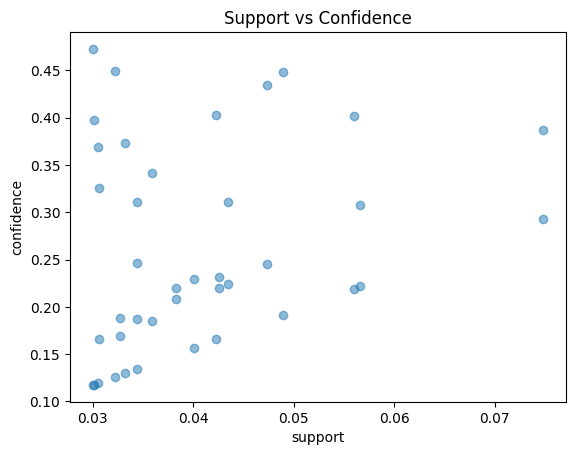

In [226]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

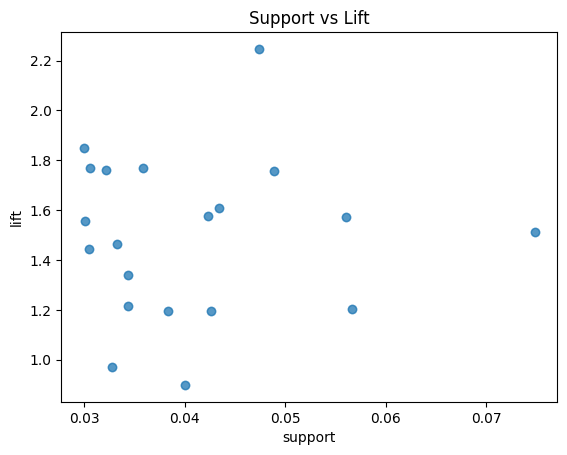

In [228]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

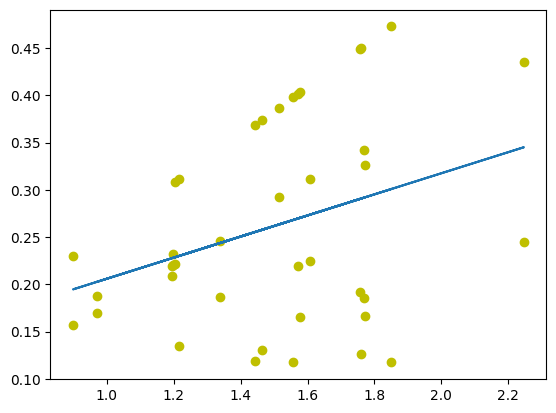

In [230]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

***
# Section: 5 - Rule Evaluation
- For the rules created above, find the single Item (that would be given the discount) that would cause the greatest increase in monthly store revenue.
  - This is based on the Business Problem stated at the top of this notebook.
  - Consider:
    - How much will the store's monthly revenue decrease (or increase) due to the change in price for the chosen Item (and its increased sales)?
    - How much will the store's monthly revenue increase (or decrease) due to the increased sales of the associated Items?
***

In [222]:
max_rev_gain_row = None
max_rev_gain = float('-inf') # monthly revenue increase due to the change in price for the chosen Item and sales of both the items
dec_in_rev = float('-inf') #  % monthly revenue  decrease due to the change in price for the chosen Item and its increased sales
inc_in_rev = float('-inf') #  % monthly revenue increase due to the increased sales of the associated Items
total_rev_inc = float('-inf') # % monthly revenue increase due to the change in price for the chosen Item and sales of both the items

# Finding antecedents and consequents which gives maximum monthly revenue after decrease in 10% in price of antecedents and increase in 5 % of sales
for index, row in rules.iterrows():
    antecedent_price = item_df[item_df['ItemName'] == list(row['antecedents'])[0]]['UnitPrice'].values[0]
    consequent_price = item_df[item_df['ItemName'] == list(row['consequents'])[0]]['UnitPrice'].values[0]

    antecedent_revenue_before_change = num_transactions * row['antecedent support'] * antecedent_price
    consequent_revenue_before_change = num_transactions * row['consequent support'] * consequent_price

    antecedent_revenue_after_change = num_transactions * row['antecedent support'] * 1.05 * antecedent_price * 0.9
    consequent_revenue_after_change = num_transactions * row['consequent support'] * row['lift'] * consequent_price

    revenue_before = antecedent_revenue_before_change + consequent_revenue_before_change 
    revenue_after = antecedent_revenue_after_change + consequent_revenue_after_change 
 
    rev_gain = revenue_after - revenue_before

    if rev_gain > max_rev_gain:
        max_rev_gain = rev_gain
        max_rev_gain_row = row
        total_rev_after_decrease_val_of_antecedent = antecedent_revenue_after_change + consequent_revenue_before_change
        total_rev_after_increase_sales_of_consequent = antecedent_revenue_before_change + consequent_revenue_after_change
        dec_in_rev = ((total_rev_after_decrease_val_of_antecedent  - revenue_before)/ revenue_before)
        inc_in_rev = ((total_rev_after_increase_sales_of_consequent  - revenue_before)/ revenue_before)
        total_rev_inc = (rev_gain / revenue_before)    

In [223]:
max_rev_gain_row

antecedents            (root vegetables)
consequents           (other vegetables)
antecedent support              0.108998
consequent support              0.193493
support                         0.047382
confidence                      0.434701
lift                            2.246605
leverage                        0.026291
conviction                      1.426693
zhangs_metric                   0.622764
Name: 8, dtype: object

In [224]:
choosen_antecedent = list(max_rev_gain_row[0])[0]
choosen_consequent = list(max_rev_gain_row[1])[0]

print(f'Choosen antecedent is : {choosen_antecedent} and choosen consequent is : {choosen_consequent}')
print(f'Increase in total Monthly Revenue after decrease in price of {choosen_antecedent} and increase in sales of {choosen_antecedent} and {choosen_consequent} : {round(max_rev_gain, 5)}' )
print(f'Increase in total Monthly Revenue after decrease in price of {choosen_antecedent} and increase in sales of {choosen_antecedent} and {choosen_consequent} : {round(total_rev_inc * 100, 2)}%' )
print(f'Question 5.A: Monthly revenue decrease after decrease in price of {choosen_antecedent} and increase in sales of {choosen_antecedent} and {choosen_consequent} : {round(dec_in_rev * 100, 2)}%' )
print(f'Question 5.B: Monthly revenue increase after increase in sales of {choosen_consequent} : {round(inc_in_rev * 100, 2)}%' )


Choosen antecedent is : root vegetables and choosen consequent is : other vegetables
Increase in total Monthly Revenue after decrease in price of root vegetables and increase in sales of root vegetables and other vegetables : 44209.00191
Increase in total Monthly Revenue after decrease in price of root vegetables and increase in sales of root vegetables and other vegetables : 85.97%
Question 5.A: Monthly revenue decrease after decrease in price of root vegetables and increase in sales of root vegetables and other vegetables : -1.63%
Question 5.B: Monthly revenue increase after increase in sales of other vegetables : 87.6%


After creating the rules, I calculated the maximum total revenue for each entity in rules set.

- **Total monthly revenue** change can be calculated (revenue after change - revenue before change) (Note: Here the *change* indicates 10% decrease in price of antecedent and increase in 5% sales).
- **revenue before and after change** is sum of revenue of each items i.e.antecedent and consequent before and after change
- **revenue of each item before change** can be calculated by multiplying total number of transactions, frequency of item(support) and its price.
- **revenue of antecedent after change** can be calculated by multiplying total number of transactions, frequency of item(support), its price, 1.05 and 0.9. Figures, 1.05 indicates 5% increase in sales whereas 0.9 indicates decrease in 10% price.
- **revenue of consequent after change** can be can be calculated by multiplying total number of transactions, frequency of itoriginalem(support), its price, and lift.
- **monthly revenue decrease due to the change in price for the antecedent and its increased sales** can be calculated by finding change in revenue(i.e revenue after increase in price and sales of antecedent - original revenue) /(original revenue). (Note: Here, I used old price of consequent instead of using new price after change as only antecedent price has to changed according to the given question).
- **monthly revenue increase due to the change in price for the  increased sales of items** can be calculated by finding change in revenue(i.e revenue after increase salse of items - original revenue) /(original revenue). (Note: Here, I used old price of antecedent instead of using new price after change as only consequent price has to changed according to the given question).

***
# Section: 6 - Conclusions
- Write a paragraph on what you discovered or learned from this homework.
***

Through the homework on the association rules algorithm, I learned about two popular algorithms for mining association rules: Apriori and FPGrowth. I gained insights over how to create itemsets, generate association rules, and evaluate the strength of these relationships using metrics such as support, confidence, and lift. It helped me understand that by applying this technique to real-world problems such as increasing revenue in a retail store, we can gain insights into customer behavior and design effective strategies to promote associated items. 

***
### END-OF-SUBMISSION
***